## EDA
Importing libraries & data

In [1]:
import pandas as pd
import openpyxl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
delay_df = pd.read_excel('data/get_around_delay_analysis.xlsx',sheet_name='rentals_data')
doc =  pd.read_excel('data/get_around_delay_analysis.xlsx',sheet_name='Documentation')
pricing_df = pd.read_csv('data/get_around_pricing_project.csv')

### PRICING

In [3]:
pricing_df.drop('Unnamed: 0',axis=1,inplace=True) # useless column from excel file
pricing_df.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [4]:
pricing_df.describe(include='all')

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


The pricing dataframe looks fairly clean, with no missing data... But minimum mileage is negative ? max is 1000376 ? We have some outliers and even incoherent values

In [17]:
# removing outliers 3 standard deviations away from mean for mileage and rental price per day
prep = pricing_df.loc[pricing_df['mileage'] < pricing_df['mileage'].mean() + pricing_df['mileage'].std()*3]
prep = prep.loc[prep['mileage'] > pricing_df['mileage'].mean() - pricing_df['mileage'].std()*3]
prep = prep.loc[prep['rental_price_per_day'] < prep['rental_price_per_day'].mean() + prep['rental_price_per_day'].std()*3]
prep = prep.loc[prep['rental_price_per_day'] > prep['rental_price_per_day'].mean() - prep['rental_price_per_day'].std()*3]
prep = prep.loc[prep['engine_power'] > prep['engine_power'].mean() - prep['engine_power'].std()*3]
pricing_df_clean = prep.loc[prep['engine_power'] < prep['engine_power'].mean() + prep['engine_power'].std()*3]

In [34]:
pricing_df_clean.describe(include='all')

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4709,4709.000000,4709.000000,4709,4709,4709,4709,4709,4709,4709,4709,4709,4709,4709.000000
unique,26,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,947,NaN,NaN,4531,1583,1583,2566,3743,3778,3797,2527,3582,4388,NaN
mean,NaN,139527.367806,127.028669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.421746
std,NaN,54264.204152,35.072873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.868077
min,NaN,476.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000
25%,NaN,103626.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,141068.000000,120.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,174758.000000,135.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [35]:
print(f" After removing outliers, our new dataframe has {round(len(pricing_df_clean)/len(pricing_df)*100,2)}% of previous data")

 After removing outliers, our new dataframe has 97.23% of previous data


Plotting average rental price per car brand

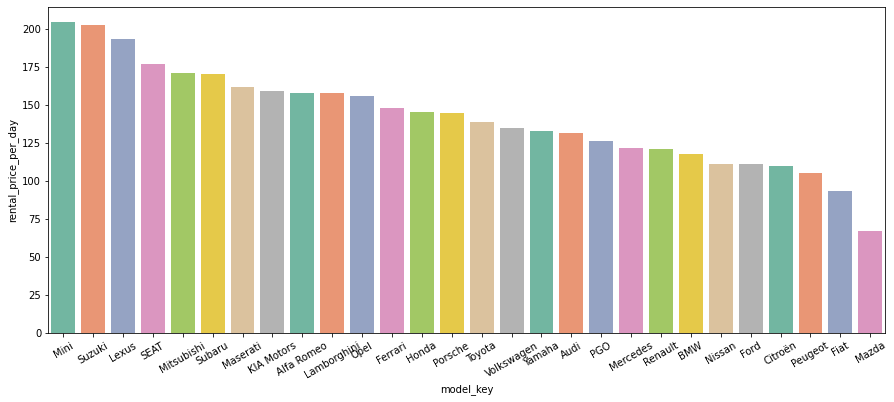

In [248]:
models_df = pricing_df_clean.groupby('model_key').mean().sort_values(by='rental_price_per_day',ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=models_df.index,y=models_df['rental_price_per_day'],palette='Set2')
plt.xticks(rotation=30)
plt.show()

Plotting how much money rentals actually bring in, per car brand

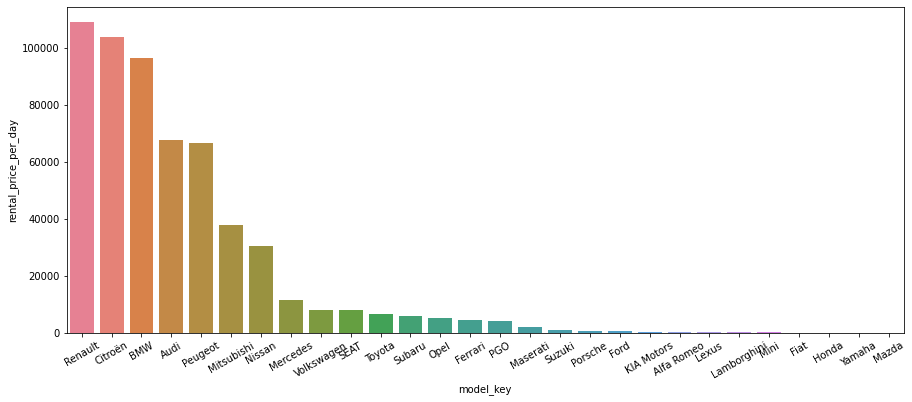

In [249]:
models2_df = pricing_df_clean.groupby('model_key').sum().sort_values('rental_price_per_day',ascending=False)

plt.figure(figsize=(15,6))
sns.barplot(x=models2_df.index,y=models2_df['rental_price_per_day'],palette='husl')
plt.xticks(rotation=30)
plt.show()

The 5 top brands (Renault, Citroën, BMW, Audi and Peugeot) are on the cheaper side but much more important to the business, with more than 75% of income from rentals.

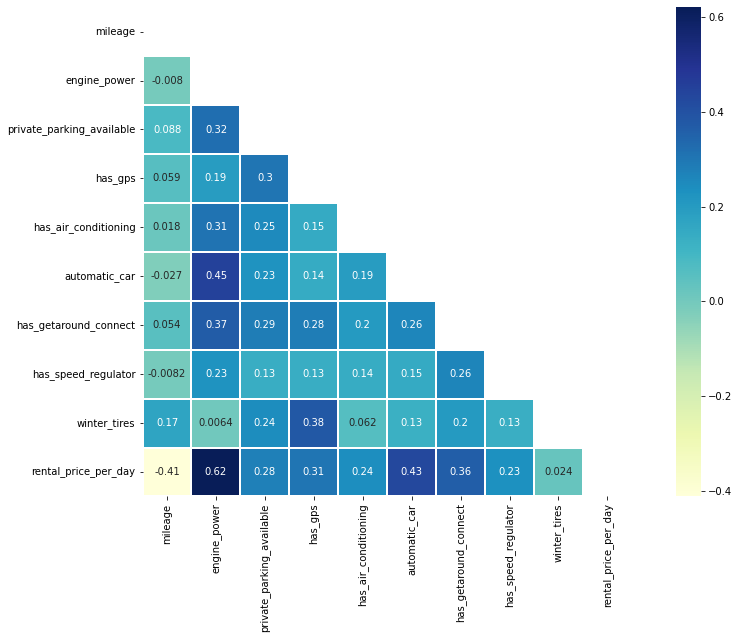

In [70]:
plt.figure(figsize=(16,9))
 
corr_mx = pricing_df_clean.corr()
matrix = np.triu(corr_mx) # take upper correlation matrix
 
sns.heatmap(corr_mx, mask=matrix,annot=True, cmap = 'YlGnBu', linewidths=0.1, square=True)
plt.show()

Bigger engine power, comfort options and less mileage contribute to a higher rental price per day. This makes sense !

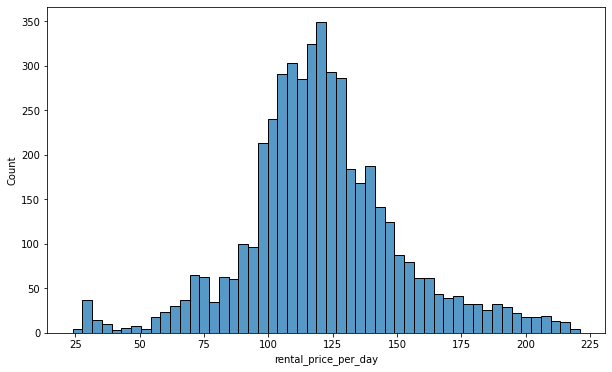

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(pricing_df_clean['rental_price_per_day'])
plt.show()

Most rentals cost between 100 and 150 per day

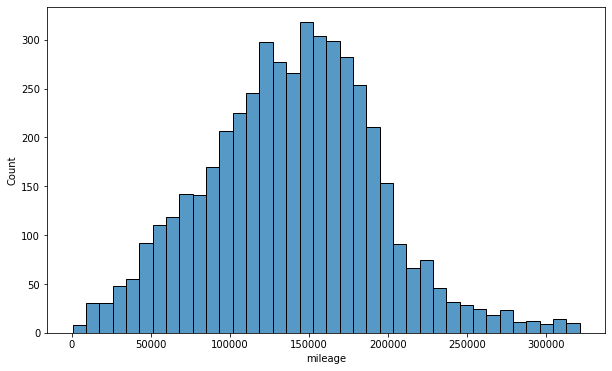

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(pricing_df_clean['mileage'])
plt.show()

A lot of cars are far from new, but only few have more than 200.000 kms (I am assuming kilometers since we're in Europe...) and most seem to get retired at this point .

### DELAY

In [4]:
delay_df.head()

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


Unfortunately, we don't have a direct correspondance between the 2 datasets ; a shared key such as car_id would be useful.

In [5]:
delay_df.isna().sum()

rental_id                                         0
car_id                                            0
checkin_type                                      0
state                                             0
delay_at_checkout_in_minutes                   4964
previous_ended_rental_id                      19469
time_delta_with_previous_rental_in_minutes    19469
dtype: int64

In [11]:
with pd.option_context('display.max_colwidth', None):
  display(doc)

,field name,Comment
0,rental_id,Unique identifier of the rental
1,car_id,Unique identifier of the car
2,checkin_type,"Flow used for both checkin and checkout. (ie. access and return the car)\nmobile = rental agreement signed on the owner's smartphone\nconnect = car equiped with the Connect technology , opened by the driver with his smartphone.\nNote: paper contracts were excluded from the data as we have no data on their delay at checkout and it's negligible use case"
3,state,canceled means that the rental did not happen (was canceled by the driver or the owner).
4,delay_at_checkout_in_minutes,Difference in minutes between the rental end time requested by the driver when booking the car and the actual time the driver completed the checkout. Negative values mean that the driver returned the car in advance.
5,previous_ended_rental_id,id of the previous ended rental of the car (NULL when no previous rental or delay with previous rental higher than 12 hours)
6,time_delta_with_previous_rental_in_minutes,"Difference in minutes between this rental planned start time and the previous rental planned end time (when lower than 12 hours, NULL if higher)"


In [3]:
checkout = []
for x in delay_df['delay_at_checkout_in_minutes']:
    if x < 0:
        checkout.append('Early')
    elif x < 15:
        checkout.append('Late 0-15')
    elif x < 30:
        checkout.append('Late 15-30')
    elif x < 60:
        checkout.append('Late 30-60')
    elif x < 120 :
        checkout.append('Late 60-120')
    elif x >= 120 :
        checkout.append('Very late')        
    else:
        checkout.append('NA')

delay_df['checkout'] = checkout
delay_df['checkout'].value_counts()

Early          6820
NA             4964
Very late      2568
Late 0-15      2003
Late 60-120    1860
Late 30-60     1722
Late 15-30     1373
Name: checkout, dtype: int64

In [4]:
delay_df['next_rental'] = [True if x > 0 else False for x in delay_df.previous_ended_rental_id]

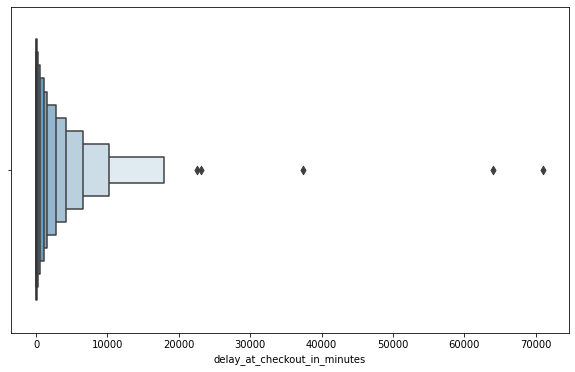

In [8]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=delay_df[delay_df['checkout']!='Early'], x='delay_at_checkout_in_minutes',scale='linear')
plt.show()

We can see some outliers, possibly even wrong values (71084 minutes, that's nearly 50 days !)

In [5]:
delays = []
for x in delay_df['delay_at_checkout_in_minutes']:
    if x < delay_df['delay_at_checkout_in_minutes'].quantile(0.01):
        delays.append(np.nan)
    elif x > delay_df['delay_at_checkout_in_minutes'].quantile(0.99):
        delays.append(np.nan)     
    else:
        delays.append(x)

delay_df['delays_checkout_min_cleaned'] = delays

In [285]:
delay_df.describe(include='all')

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,checkout,next_rental,delays_checkout_min_cleaned
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000,21310,21310,16019.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,7,2,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN,Early,False,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN,6820,19469,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430,NaN,NaN,31.599600
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486,NaN,NaN,215.203776
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000,NaN,NaN,-853.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000,NaN,NaN,-35.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000,NaN,NaN,9.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000,NaN,NaN,65.000000


In [2]:
#delay_df.to_csv('api/delay_df.csv',index=False)
#pricing_df_clean.to_csv('api/pricing_df.csv',index=False)

delay_df = pd.read_csv('api/delay_df.csv')
pricing_df_clean = pd.read_csv('api/pricing_df.csv')

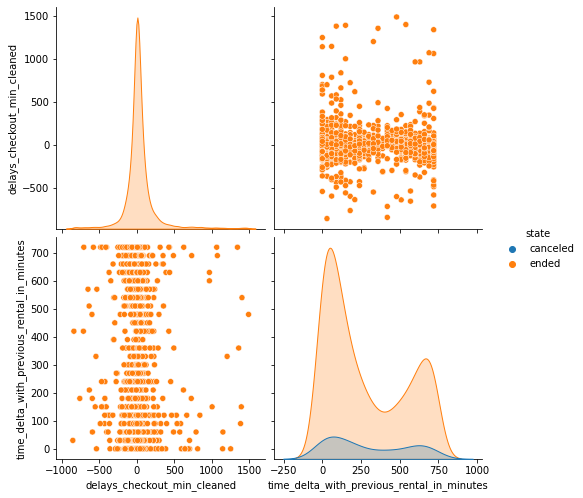

In [15]:
pairplot_df = delay_df[['state','delays_checkout_min_cleaned','time_delta_with_previous_rental_in_minutes']]
sns.pairplot(data=pairplot_df,hue='state',height=3.5)
plt.show()

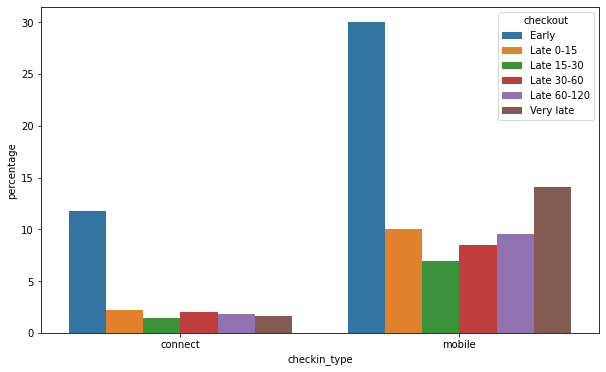

In [18]:
checkout_clean = delay_df.dropna(subset=['delay_at_checkout_in_minutes'])
checktype_checkout = checkout_clean.groupby(['checkin_type','checkout']).size().reset_index(name='count')
checktype_checkout['percentage'] = [i / checktype_checkout['count'].sum() * 100 for i in checktype_checkout['count']]

plt.figure(figsize=(10,6))
sns.barplot(y=checktype_checkout['percentage'],x=checktype_checkout['checkin_type'], hue=checktype_checkout['checkout'],orient='vertical')
plt.show()

In [10]:
delay_df.checkout.value_counts()/delay_df.checkout.count()*100

Early          32.003754
NA             23.294228
Very late      12.050680
Late 0-15       9.399343
Late 60-120     8.728297
Late 30-60      8.080713
Late 15-30      6.442985
Name: checkout, dtype: float64

Most late checkouts are still within the next 2 hours, so we can reasonably hope to significantly reduce risk by setting a threshold.<br>

Mobile check in type is more frequent, but otherwise the distribution is fairly close despite a little more NA's. 

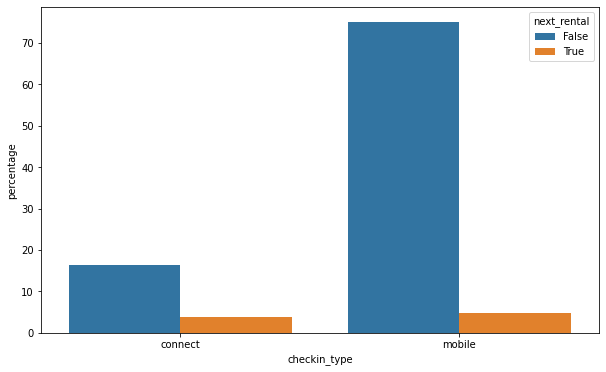

In [190]:
has_next = delay_df.groupby(['checkin_type','next_rental']).size().reset_index(name='count')
has_next['percentage'] = [i / has_next['count'].sum() * 100 for i in has_next['count']]

plt.figure(figsize=(10,6))
sns.barplot(y=has_next['percentage'],x=has_next['checkin_type'], hue=has_next['next_rental'],orient='vertical')
plt.show()

In [294]:
connect_share = (delay_df['checkin_type'].value_counts()/delay_df['checkin_type'].count()*100)[1]
mobile_share = (delay_df['checkin_type'].value_counts()/delay_df['checkin_type'].count()*100)[0]
connect_canceled = (delay_df[delay_df['state']=='canceled']['checkin_type'].value_counts()/delay_df[delay_df['state']=='canceled']['checkin_type'].count()*100)[1]

print(f"Mobile use is prevalent with a {round(mobile_share,2)}% share and Connect has a {round(connect_share,2)}% share. However, {round(connect_canceled)}% of cancellations are with Connect, \
suggesting a bigger impact from cancellations on this type of rental flow.")

Mobile use is prevalent with a 79.79% share and Connect has a 20.21% share. However, 24% of cancellations are with Connect, suggesting a bigger impact from cancellations on this type of rental flow.


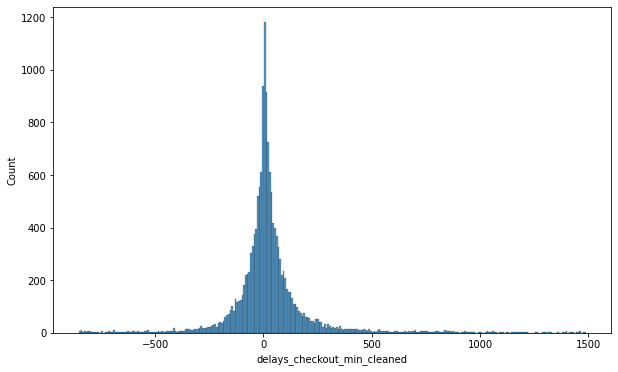

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data=delay_df,x='delays_checkout_min_cleaned')
plt.show()

There are still a lot of outliers even after removing the most extreme. It would be interesting to have data on rental duration, since it is just stated that rentals are for "a few hours to a few days".

In [59]:
late_df = delay_df[delay_df['delays_checkout_min_cleaned']>0]

drivers_late = len(late_df)
drivers_total = len(delay_df)
percentage_drivers_late = drivers_late/drivers_total*100
percentage_drivers_late
print(f"On average, {round(percentage_drivers_late,2)} % of drivers are late")

On average, 43.36 % of drivers are late


In [60]:
time_late = late_df['delays_checkout_min_cleaned'].sum()/len(late_df)
print(f"On average, late drivers are {round(time_late,2)} minutes late")

On average, late drivers are 124.32 minutes late


#### Setting a threshold

If we put in place a threshold between checkout and new checkin, how many drivers would be affected?

In [238]:
impacted_df = delay_df.dropna(subset=['time_delta_with_previous_rental_in_minutes'])
impacted_df['difference'] = impacted_df['time_delta_with_previous_rental_in_minutes'] - impacted_df['delays_checkout_min_cleaned']
issues = len(impacted_df[impacted_df['difference'] < 0])
issues_percentage = issues/len(delay_df)*100

In [263]:
print(f"{issues} of drivers ({round(issues_percentage,2)}%) have an issue with the time delta between rentals")

print(f"{len(impacted_df[impacted_df['difference'] < -30])} drivers causing an issue are more than 30 minutes late")

print(f"Implementing a 30 minutes delay would impact {len(impacted_df[impacted_df['time_delta_with_previous_rental_in_minutes'] < 30])} drivers")

257 of drivers (1.21%) have an issue with the time delta between rentals
178 drivers causing an issue are more than 30 minutes late
Implementing a 30 minutes delay would impact 279 drivers


In [271]:
threshold_range = np.arange(0, 60*12, step=15) # 15min intervals for 12 hours
impacted_list_mobile = []
impacted_list_connect = []
impacted_list_total = []
solved_list_mobile = []
solved_list_connect = []
solved_list_total = []

solved_list = []
for t in threshold_range:
    impacted = impacted_df.dropna(subset=['time_delta_with_previous_rental_in_minutes'])
    connect_impact = impacted[impacted['checkin_type'] == 'connect']
    mobile_impact = impacted[impacted['checkin_type'] == 'mobile']
    connect_impact = connect_impact[connect_impact['time_delta_with_previous_rental_in_minutes'] < t]
    mobile_impact = mobile_impact[mobile_impact['time_delta_with_previous_rental_in_minutes'] < t]
    impacted = impacted[impacted['time_delta_with_previous_rental_in_minutes'] < t]
    impacted_list_connect.append(len(connect_impact))
    impacted_list_mobile.append(len(mobile_impact))
    impacted_list_total.append(len(impacted))

    solved = impacted_df[impacted_df['difference'] < 0]
    connect_solved = solved[solved['checkin_type'] == 'connect']
    mobile_solved = solved[solved['checkin_type'] == 'mobile']
    connect_solved = connect_solved[connect_solved['delay_at_checkout_in_minutes'] < t]
    mobile_solved = mobile_solved[mobile_solved['delay_at_checkout_in_minutes'] < t]
    solved = solved[solved['delay_at_checkout_in_minutes'] < t]
    solved_list_connect.append(len(connect_solved))
    solved_list_mobile.append(len(mobile_solved))
    solved_list_total.append(len(solved))

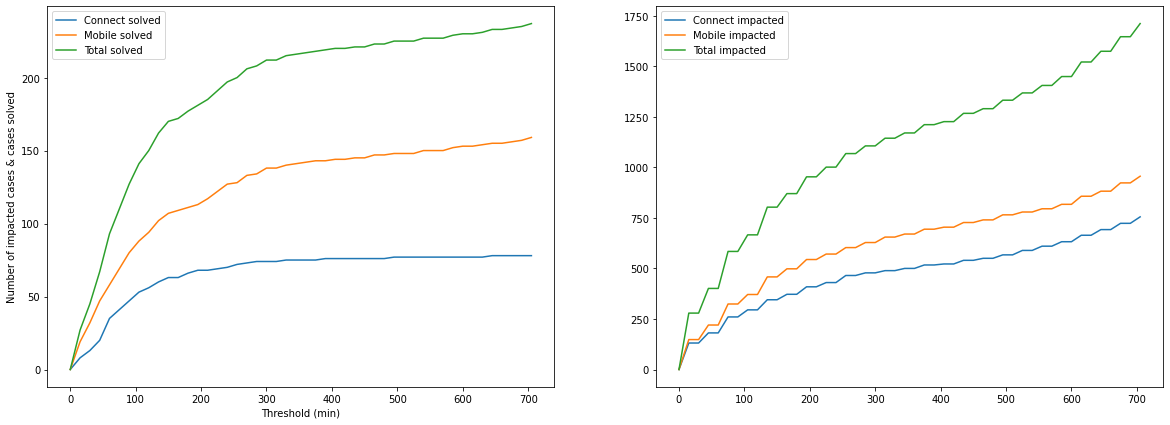

In [272]:
ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(20,7))
ax[0].plot(threshold_range, solved_list_connect)
ax[0].plot(threshold_range, solved_list_mobile)
ax[0].plot(threshold_range, solved_list_total)
ax[1].plot(threshold_range, impacted_list_connect)
ax[1].plot(threshold_range, impacted_list_mobile)
ax[1].plot(threshold_range, impacted_list_total)
ax[0].set_xlabel('Threshold (min)')
ax[0].set_ylabel('Number of impacted cases & cases solved')
ax[0].legend(['Connect solved','Mobile solved','Total solved' ])
ax[1].legend(['Connect impacted','Mobile impacted','Total impacted' ])
plt.show()

We can see a similar behavior for both Connect and Mobile cases, though a plateau is hit a little faster for Connect rentals.<br>
There is unfortunately a significant number of other rentals impacted (that could not occur as they would have) in implementing the threshold, which has to be evaluated against the positive effects in user experience.

We can see that the curve of cases solved start to slow significantly after 120 minutes and even more around 180 (which is actually a plateau for Connect cases).

Therefore our recommendation would be to **implement the threshold at 120 minutes** and in any case no more than 180.

Overall the effect seems best if implemented on both Connect and Mobile rentals, but a sound approach would be to start with Connect, the smaller sample size (also the specificity of this checkin type with less human interaction makes it ideal).

#### Further Analysis, another way to look at it.

We can also look at this from a purely business standpoint. Ideally, we would want to fix user experience. However, our data doesn't contain feedback from users, so I'll look at one thing that is still sure to matter to most : money.

I stress that this is a projection on a completely strained situation of permanent demand for rentals.

In this theoretical situation, let's look at:
- How much is lost from delays
- Quantify the ratio of risks & benefits
- Looking again at what threshold should be set to improve this ratio

Since we have no information on how long a typical rental is and we have fairly high delays, I'll go with 1 day.

In [64]:
# selecting canceled rides
canceled = (delay_df['state'] == 'canceled').sum()
median_rental = pricing_df_clean['rental_price_per_day'].median() #median rental price is 119 dollars
canceled_loss = canceled*median_rental 

print(f"At the median rate and assuming an average of 24hour rental, the {canceled} cancellations totaled a {canceled_loss} $ max loss")

At the median rate and assuming an average of 24hour rental, the 3265 cancellations totaled a 388535.0 $ max loss


What is this "max loss" ? Not an absolute. It's more like money not made, really.

It relies on a few assumptions :
- First, that the user renting his car seeks to absolutely optimize revenue.
- Second, that all cancellations are due to delays.
- Third, that no money is made from the additional time fater the planned checkout time.
- Fourth, that users renting a car don't wait ; in case of a delay, they cancel outright.

In [65]:
number_delays = (delay_df['delays_checkout_min_cleaned'] > 0).sum()
sum_delays = delay_df[delay_df['delays_checkout_min_cleaned'] > 0]['delays_checkout_min_cleaned'].sum() # sum of delays superior to 0, in minutes
minute_rate = median_rental/1440 #1440 minutes in a day
late_revenue = sum_delays*minute_rate

print(f"Supposing a rate by the minute with no penalty for a late checkout, the {number_delays} late arrivals brought in {round(late_revenue,2)} $ (not counting outliers)")

Supposing a rate by the minute with no penalty for a late checkout, the 9240 late arrivals brought in 94925.39 $ (not counting outliers)


If late checkouts have to pay for the additional time at a rate by the minute, some of the "max loss" is mitigated.

In [129]:
late_loss = canceled_loss - late_revenue
print(f"If canceled rentals were for less than {round(late_revenue/canceled_loss*24,2)} hours, additional revenue from late checkouts and loss from canceled rentals break even.")
print(f"Or generates a {round(late_loss,2)} $ loss for a full day, still assuming all cancelled rentals were because of a late checkout.")

If canceled rentals were for less than 5.86 hours, additional revenue from late checkouts and loss from canceled rentals break even.
Or generates a 293609.61 $ loss for a full day, still assuming all cancelled rentals were because of a late checkout.


The "max loss" supposes a 24 hour average rental. If cancelled rentals were actually for smaller durations, there is much less impact.

In [66]:
threshold_range = np.arange(0, 60*24, step=15) # 15min intervals in a day
total_late_revenue = []
for i in threshold_range:
    late_revenue_growing = delay_df[delay_df['delays_checkout_min_cleaned'] > i]['delays_checkout_min_cleaned'].sum()*minute_rate
    total_late_revenue.append(late_revenue_growing)
total_late_revenue.reverse()

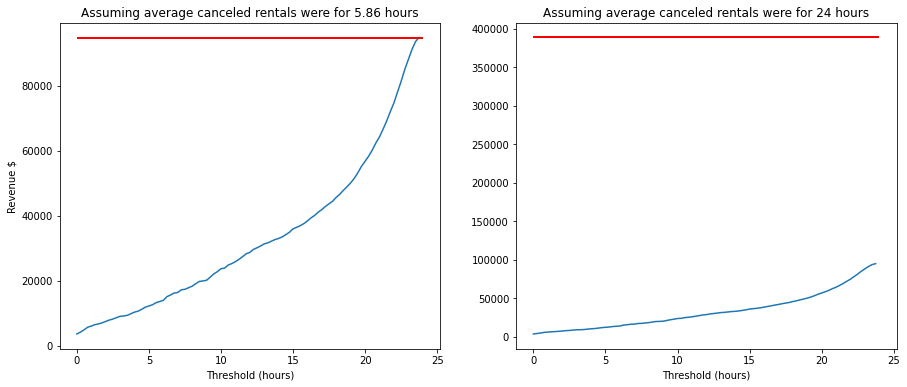

In [220]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,6))
ax[0].plot(threshold_range/60, total_late_revenue)
ax[0].hlines(y=canceled_loss/24*5.86, xmin=0, xmax=24, linewidth=2, color='r')
ax[0].set_title('Assuming average canceled rentals were for 5.86 hours')
ax[0].set_xlabel('Threshold (hours)')
ax[1].set_xlabel('Threshold (hours)')
ax[0].set_ylabel('Revenue $')
ax[1].plot(threshold_range/60, total_late_revenue)
ax[1].hlines(y=canceled_loss, xmin=0, xmax=24, linewidth=2, color='r')
ax[1].set_title('Assuming average canceled rentals were for 24 hours')
plt.show()

At this point we would really need more time data (duration of each ride, how much time a car spends unused, are there other cars available...) to accurately estimate losses.

We can calculate the "maximum risk" of late arrivals.
This is even more theoretical since it assumes:
- Every minute late results in a cancellation
- All rentals have a next one planned 
- All cancelled rentals would have been a 24 hour rental

In [105]:
at_risk = number_delays*minute_rate*1440
ended = (delay_df['state'] == 'ended').sum()
revenue = ended*median_rental + late_revenue
risk_over_revenue = round(at_risk/(revenue),2)

print(f"Late arrivals triggered a maximum risk of {at_risk} $, so about {risk_over_revenue} times the total estimated revenue from rentals of {round(revenue,2)} $")

Late arrivals trigger a maximum risk of 1099560.0 $, so about 0.49 times the total estimated revenue from rentals of 2242280.39 $


We can see that ignoring this would have devastating consequences in this situation. It is not "real" of course, but it is interesting to see how much there is left to optimize !

We don't actually know that all cancellations are linked to a late checkout however, nor that it is not compensated by re-allocating cars to other rentals.<br>
It would be useful to have more data on this issue, such as maybe asking users why they cancelled ? This would help us isolate the cost of late arrivals and incidentally could also unveil other issues that users might have with the rental service.

Next we'll try to set an acceptable threshold, but it would also be worthwhile to set a penalty for late arrivals and increase the rental rate after the due hour.<br>

In [199]:
threshold_range = np.arange(60*24, step=15) 
penalty = 3  # penalty for late arrival is set at 3 times the normal minute rate
risk_over_revenue_penalty= []

for t in threshold_range:
    count = (delay_df['delays_checkout_min_cleaned'] > t).sum()
    late_revenue_penalty = delay_df[delay_df['delays_checkout_min_cleaned'] > t]['delays_checkout_min_cleaned'].sum() * minute_rate * penalty
    late_risk = count * median_rental
    risk_over_revenue_penalty.append(late_risk/late_revenue_penalty)

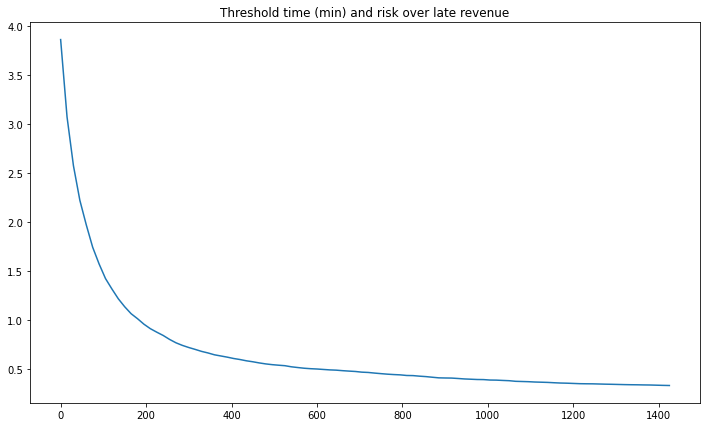

In [219]:
plt.figure(figsize=(12,7))
sns.lineplot(x=threshold_range,y=risk_over_revenue_penalty)
plt.title('Threshold time (min) and risk over late revenue')
plt.show()

For standard rentals of 1 day and a penalty of 3 times the normal minute rate after the rental is due, with our current data we would need to set a threshold of 180 minutes to mitigate losses from late checkouts.


**Additional remarks** :<br>
A significant caveat is that all this, on top of some assumptions (duration of rental, maximum loss...), does not take into account actual demand in rentals. This has limited production applications and this should not be relied upon as neither a comprehensive projection of revenue nor a reliable way to alleviate user discomfort (see assumptions for "max loss" and "max risk" above.

A reduced profit margin is not a perfectly accurate way to account for user discomfort and a new metric should be made, perhaps using the results of a poll to estimate the impact of delays on the user experience.

It should also be noted that in order to fully measure the potential negative or positive impact of implementing this new delay, we would need start and end times of all rentals.